In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving delhivery_data.csv to delhivery_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('delhivery_data.csv')
df=data.copy()
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
df.shape

(144867, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Removing Unknown Fields**

In [7]:
unknown_fields=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
df.drop(unknown_fields,axis=1,inplace=True)

In [8]:
df.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [9]:
for i in df.columns:
  print(f"Unique entry for {i} = {df[i].nunique()}")

Unique entry for data = 2
Unique entry for trip_creation_time = 14817
Unique entry for route_schedule_uuid = 1504
Unique entry for route_type = 2
Unique entry for trip_uuid = 14817
Unique entry for source_center = 1508
Unique entry for source_name = 1498
Unique entry for destination_center = 1481
Unique entry for destination_name = 1468
Unique entry for od_start_time = 26369
Unique entry for od_end_time = 26369
Unique entry for start_scan_to_end_scan = 1915
Unique entry for actual_distance_to_destination = 144515
Unique entry for actual_time = 3182
Unique entry for osrm_time = 1531
Unique entry for osrm_distance = 138046
Unique entry for segment_actual_time = 747
Unique entry for segment_osrm_time = 214
Unique entry for segment_osrm_distance = 113799


**Converting datatypes of columns to category where there are 2 values**

In [10]:
df['data']=df['data'].astype('category')
df['route_type']=df['route_type'].astype('category')

In [11]:
floating_values=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
for i in floating_values:
  print(round(df[i].max(),1))


7898.0
1927.4
4532.0
1686.0
2326.2
3051.0
1611.0
2191.4


In [12]:
for i in floating_values:
  df[i]=df[i].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   data                            144867 non-null  category
 1   trip_creation_time              144867 non-null  object  
 2   route_schedule_uuid             144867 non-null  object  
 3   route_type                      144867 non-null  category
 4   trip_uuid                       144867 non-null  object  
 5   source_center                   144867 non-null  object  
 6   source_name                     144574 non-null  object  
 7   destination_center              144867 non-null  object  
 8   destination_name                144606 non-null  object  
 9   od_start_time                   144867 non-null  object  
 10  od_end_time                     144867 non-null  object  
 11  start_scan_to_end_scan          144867 non-null  float32 
 12  ac

Memory usage will be reduced by converting datatype into float

# **1- Basic data cleaning and exploration**

**Handling Missing Values**

In [14]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [15]:
missing_source_names=df.loc[df['source_name'].isnull(),'source_center'].unique()
missing_source_names

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [16]:
missing_destination_names=df.loc[df['destination_name'].isnull(),'destination_center'].unique()
missing_destination_names

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [17]:
count=1
for i in missing_source_names:
  df.loc[(df['source_center']==i)&(df['source_name'].isnull()),'source_name']=f'source_{count}'
  count+=1

In [18]:
count=1
for i in missing_destination_names:
  df.loc[(df['destination_center']==i)&(df['destination_name'].isnull()),'destination_name']=f'location_{count}'
  count+=1

In [19]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**Converting Columns to Date time Datatype**

In [20]:
datetime_columns=['trip_creation_time','od_start_time','od_end_time']
for i in datetime_columns:
  df[i]=pd.to_datetime(df[i])

**Analysis Of Structure & Characteristics Of The Dataset**

In [21]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262939,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809
std,NaN,NaN,NaN,1036.997803,344.979126,598.096069,308.004333,421.117462,53.566002,14.770471,17.860197


In [22]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1508,1481,1481
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


#  **2- Merging the rows & Aggregating the fields**

**Grouping by sub-journey in the trip**

In [23]:
df['segment_key']=df['trip_uuid']+df['source_center']+df['destination_center']
segment_col = ['segment_actual_time','segment_osrm_time','segment_osrm_distance']
for col in segment_col:
  df[col + '_sum']=df.groupby('segment_key')[col].cumsum()
df[[col + '_sum' for col in segment_col]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.965300
1,24.0,20.0,21.724300
2,40.0,27.0,32.539497
3,61.0,39.0,45.561897
4,67.0,44.0,49.477200
...,...,...,...
144862,92.0,94.0,65.348701
144863,118.0,115.0,82.721199
144864,138.0,149.0,103.426498
144865,155.0,176.0,122.315002


**Aggregate at sub-journey level**

In [24]:
create_segment_dict={'data':'first','trip_creation_time':'first',
'route_schedule_uuid':'first','route_type':'first','trip_uuid':'first','source_center':'first'
,'source_name':'first',
'destination_center':'last','destination_name':'last','od_start_time':'first','od_end_time':'first','start_scan_to_end_scan':'first'
,'actual_distance_to_destination':'last','actual_time':'last','osrm_time':'last','osrm_distance':'last'
,'segment_actual_time':'last','segment_osrm_time':'last','segment_osrm_distance':'last'}

In [25]:
segment=df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment=segment.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,20.0,10.0,15.069300
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,22.0,3.0,5.389800
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,15.0,7.0,6.946400
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,20.0,3.0,3.807400
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,275.0,28.0,32.850601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,11.0,8.0,8.595100
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,51.0,47.0,38.305801
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,8.0,6.0,6.499800
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,188.0,25.0,28.543699


In [26]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26368 non-null  int64         
 1   segment_key                     26368 non-null  object        
 2   data                            26368 non-null  category      
 3   trip_creation_time              26368 non-null  datetime64[ns]
 4   route_schedule_uuid             26368 non-null  object        
 5   route_type                      26368 non-null  category      
 6   trip_uuid                       26368 non-null  object        
 7   source_center                   26368 non-null  object        
 8   source_name                     26368 non-null  object        
 9   destination_center              26368 non-null  object        
 10  destination_name                26368 non-null  object        
 11  od

# **3- Feature Engineering**

**Add a new feature that calculates the time difference between od_start_time and od_end_time**

In [27]:
segment['od_time_diff_hour']=round((segment['od_end_time']-segment['od_start_time']).dt.total_seconds()/(60),2)
segment['od_time_diff_hour']

,od_time_diff_hour
0,1260.60
1,999.51
2,58.83
3,122.78
4,834.64
...,...
26363,62.12
26364,91.09
26365,44.17
26366,287.47


In [28]:
segment['total_min_diff']=round((segment['od_end_time']-segment['od_start_time'])/pd.Timedelta(minutes=1))
segment.drop(['od_start_time','od_end_time'],axis=1,inplace=True)
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,total_min_diff
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,1260.0,383.759155,732.0,329.0,446.549591,20.0,10.0,15.069300,1260.60,1261.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,999.0,440.973694,830.0,388.0,544.802673,22.0,3.0,5.389800,999.51,1000.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,58.0,24.644020,47.0,26.0,28.199400,15.0,7.0,6.946400,58.83,59.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,122.0,48.542889,96.0,42.0,56.911598,20.0,3.0,3.807400,122.78,123.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,834.0,237.439606,611.0,212.0,281.210907,275.0,28.0,32.850601,834.64,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,62.0,33.627182,51.0,41.0,42.521301,11.0,8.0,8.595100,62.12,62.0
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,91.0,33.673836,90.0,48.0,40.608002,51.0,47.0,38.305801,91.09,91.0
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,44.0,12.661944,30.0,14.0,16.018499,8.0,6.0,6.499800,44.17,44.0
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,287.0,40.546738,233.0,42.0,52.530300,188.0,25.0,28.543699,287.47,287.0


In [29]:
create_trip_dict={
    'data':'first','trip_creation_time':'first',
'route_schedule_uuid':'first','route_type':'first','trip_uuid':'first','source_center':'first'
,'source_name':'first',
'destination_center':'last','destination_name':'last','start_scan_to_end_scan':'sum','od_time_diff_hour':'sum'
,'actual_distance_to_destination':'sum','actual_time':'sum','osrm_time':'sum','osrm_distance':'sum'
,'segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'
}

In [30]:
trip=segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.11,824.732849,1562.0,717.0,991.352295,42.0,13.0,20.459099
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.61,73.186905,143.0,68.0,85.111000,35.0,10.0,10.753800
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.36,1927.404297,3347.0,1740.0,2354.066650,359.0,80.0,77.663101
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.49,17.175274,59.0,15.0,19.680000,36.0,7.0,7.909100
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.34,127.448502,341.0,117.0,146.791794,167.0,43.0,51.184299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.03,57.762333,83.0,62.0,73.462997,24.0,16.0,14.539500
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.59,15.513784,21.0,12.0,16.088200,9.0,4.0,5.643200
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.12,38.684837,282.0,48.0,58.903702,104.0,7.0,3.393900
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.52,134.723831,264.0,179.0,171.110306,91.0,81.0,70.006500


**Split the Destination Name and Source Name into separate features: City, Place, and Code**

In [31]:
trip[['destination','dest_state']]= trip['destination_name'].str.split('(',n=1,expand=True)
trip['dest_state']=trip['dest_state'].str.rstrip(')')
trip[['dest_city','dest_place','dest_code']]=trip['destination'].str.split('_',n=2,expand=True)
trip[['Source','source_state']]=trip['source_name'].str.split('(',n=1,expand=True)
trip['source_state']=trip['source_state'].str.rstrip(')')
trip[['source_city','source_place','source_code']]=trip['Source'].str.split('_',n=2,expand=True)

In [32]:
trip[['dest_state','dest_city','dest_place','dest_code','source_state','source_city','source_place','source_code']]

,dest_state,dest_city,dest_place,dest_code,source_state,source_city,source_place,source_code
0,Uttar Pradesh,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6
1,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D
2,Haryana,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB
3,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub,None,None
4,Karnataka,Sandur,WrdN1DPP,D,Karnataka,Bellary,Dc,None
...,...,...,...,...,...,...,...,...
14812,Punjab,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H
14813,Haryana,Faridabad,Blbgarh,DC,Haryana,FBD,Balabhgarh,DPC
14814,Uttar Pradesh,Kanpur,GovndNgr,DC,Uttar Pradesh,Kanpur,GovndNgr,DC
14815,Tamil Nadu,Tirchchndr,Shnmgprm,D,Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [112]:
trip[['dest_state','dest_city','dest_place','dest_code','source_state','source_city','source_place','source_code']].nunique()

,0
dest_state,31
dest_city,856
dest_place,805
dest_code,47
source_state,29
source_city,735
source_place,712
source_code,47


**Extract features such as month, year, and day from Trip_creation_time?**

In [34]:
trip['trip_creation_time']=pd.to_datetime(trip['trip_creation_time'])
trip['trip_year']=trip['trip_creation_time'].dt.year
trip['trip_month']=trip['trip_creation_time'].dt.month
trip['trip_hour']=trip['trip_creation_time'].dt.hour
trip['trip_day']=trip['trip_creation_time'].dt.day
trip['trip_week']=trip['trip_creation_time'].dt.isocalendar().week
trip['trip_day_of_week']=trip['trip_creation_time'].dt.dayofweek

In [35]:
trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_day_of_week']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_day_of_week
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14812,2018,10,23,3,40,2
14813,2018,10,23,3,40,2
14814,2018,10,23,3,40,2
14815,2018,10,23,3,40,2


In [36]:
trip.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_day_of_week
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,...,Uttar Pradesh,Kanpur,Central,H_6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,...,Haryana,Gurgaon,Bilaspur,HB,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Maharashtra,Mumbai Hub,None,None,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,Karnataka,Bellary,Dc,None,2018,9,0,12,37,2


**Analyze the number of trips created on an hourly basis?**

In [37]:
trip['trip_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [38]:
hourly_trips=trip.groupby('trip_hour')['trip_uuid'].count().reset_index()
hourly_trips.head(5)

,trip_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636


In [39]:
from matplotlib import pyplot as plt
import seaborn as sns

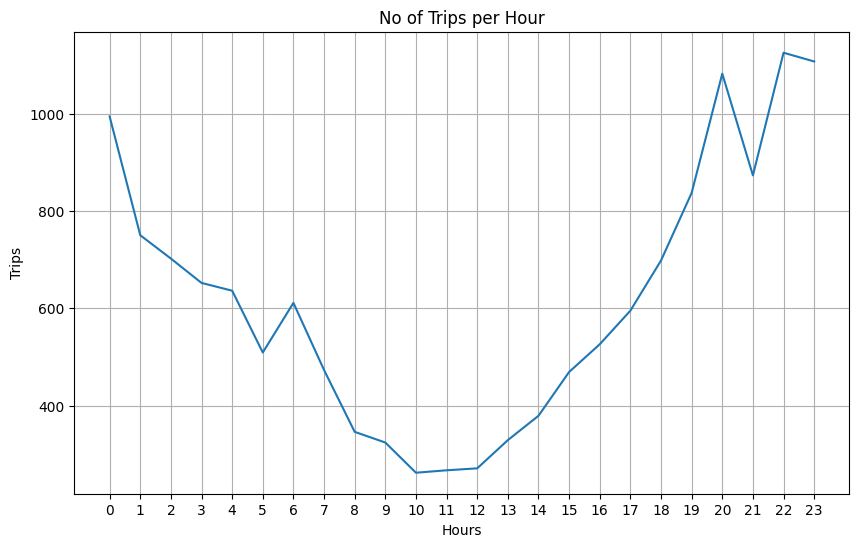

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_trips,x='trip_hour',y='trip_uuid')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Trips')
plt.title('No of Trips per Hour')
plt.xticks(range(0,24))
plt.show()

**Conclusion:**
         The trips starts at 10am and rapidly increases between 12pm till 12am.
         Midnight the trips decreases gradually

**Analyze the number of trips created for each day of the month.**

In [41]:
trip['trip_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int32)

In [42]:
daily_trips=trip.groupby('trip_day')['trip_uuid'].count().reset_index()
daily_trips.head()

,trip_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750


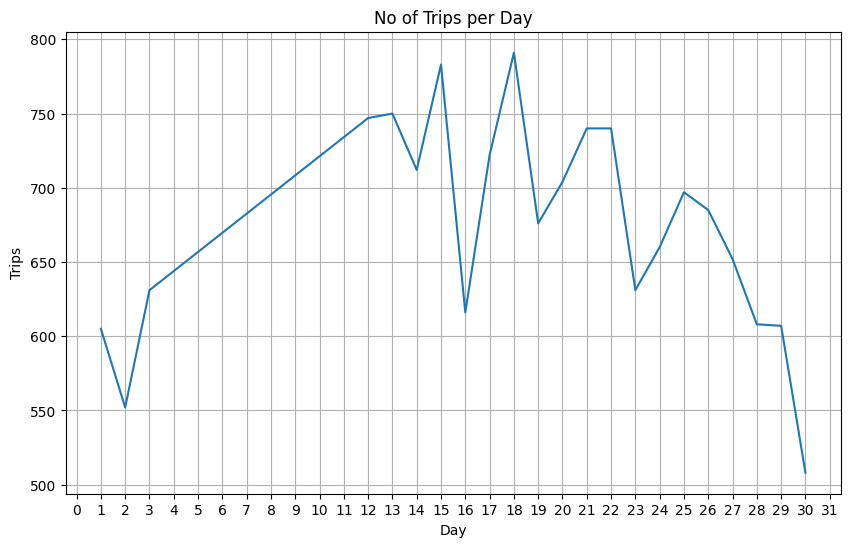

In [43]:
plt.figure(figsize=(10,6))
sns.lineplot(data=daily_trips,x='trip_day',y='trip_uuid')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Trips')
plt.title('No of Trips per Day')
plt.xticks(range(0,32))
plt.show()

**Conclusion:**

Above plot shows us that usually trips are more in the mid of the month between 12 and 25.
          
Trips are less in the start of the month and end of the month

**Analyze the number of trips created across the consecutive months.**

In [44]:
trip['trip_month'].unique()

array([ 9, 10], dtype=int32)

In [45]:
trips_per_month=trip.groupby('trip_month')['trip_uuid'].count().reset_index()
trips_per_month['percent']=np.round(trips_per_month['trip_uuid']/trips_per_month['trip_uuid'].sum()*100,2)
trips_per_month.head()

,trip_month,trip_uuid,percent
0,9,13029,87.93
1,10,1788,12.07


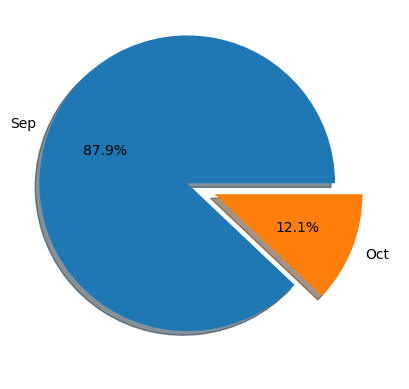

In [46]:
plt.pie(trips_per_month['trip_uuid'],labels=['Sep','Oct'],shadow=True,explode=[0.2,0],autopct='%1.1f%%')
plt.axis='equal'
plt.show()

**Conclusion:**

88% of trips are created in September month of 2018 and
Only 12% of trips are created in october month of 2018

**Route Type**

In [47]:
trip['route_type'].unique()

['FTL', 'Carting']
Categories (2, object): ['Carting', 'FTL']

In [48]:
trip_route=trip.groupby('route_type')['trip_uuid'].count().reset_index()
trip_route['percent']=np.round(trip_route['trip_uuid']*100/trip_route['trip_uuid'].sum(),2)
trip_route

/tmp/ipython-input-116046550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_route=trip.groupby('route_type')['trip_uuid'].count().reset_index()


,route_type,trip_uuid,percent
0,Carting,8908,60.12
1,FTL,5909,39.88


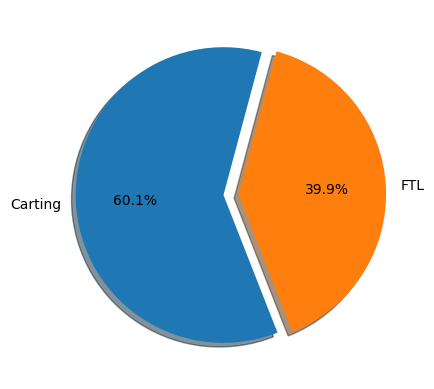

In [49]:
plt.pie(trip_route['trip_uuid'],labels=['Carting','FTL'],shadow=True,startangle = 75,explode=[0.1,0],autopct='%1.1f%%')
plt.axis='equal'
plt.show()

**Conclusion:**

60% are of carting route type and 40% are of FTL(Full Truck Load) route type

**Analyze the distribution of trips created across different states.**

In [50]:
trip['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       None], dtype=object)

In [51]:
trip_states=trip.groupby('source_state')['trip_uuid'].count().reset_index()
trip_states['percent']=np.round(trip_states['trip_uuid']*100/trip_states['trip_uuid'].sum(),2)
trip_states

,source_state,trip_uuid,percent
0,Andhra Pradesh,434,2.93
1,Arunachal Pradesh,4,0.03
2,Assam,268,1.81
3,Bihar,350,2.36
4,Chandigarh,93,0.63
5,Chhattisgarh,43,0.29
6,Dadra and Nagar Haveli,15,0.10
7,Delhi,728,4.92
8,Goa,65,0.44
9,Gujarat,750,5.07


[]

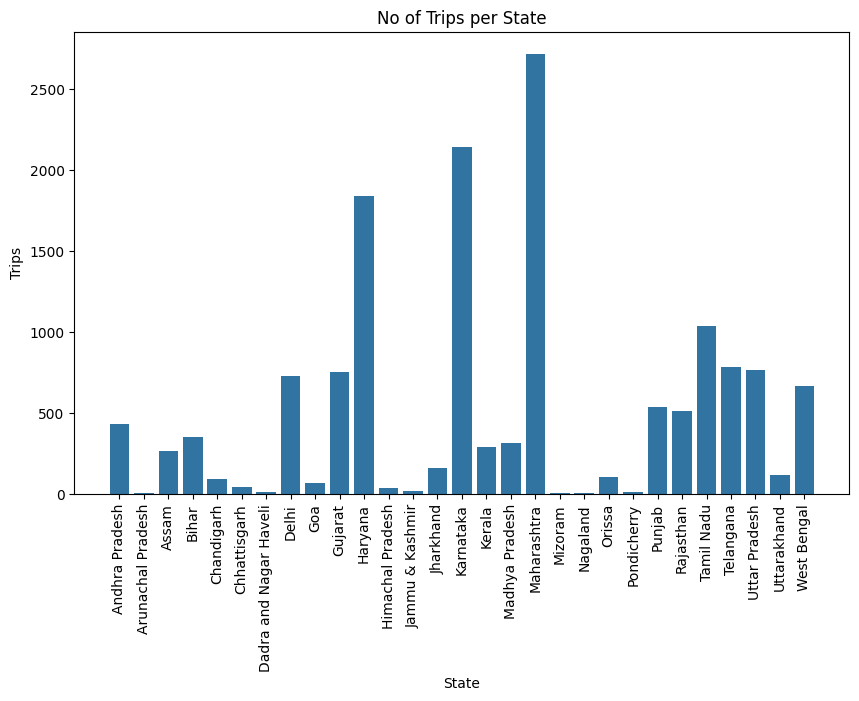

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data=trip_states,x='source_state',y='trip_uuid')
plt.xlabel('State')
plt.ylabel('Trips')
plt.title('No of Trips per State')
plt.xticks(rotation=90)
plt.plot()

**Conclusion:**

Maharastra has the highest trips created followed by Karnataka and Harayana. This tells us these three states has high seller base compared to other states.


**Analyze the distribution of trips ended across different states.**

In [118]:
trip['dest_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa',
       'Bihar', 'Jharkhand', 'Goa', 'Uttarakhand', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Nagaland', 'Meghalaya', 'Tripura', None,
       'Daman & Diu'], dtype=object)

In [120]:
tripend_states=trip.groupby('dest_state')['trip_uuid'].count().reset_index()
tripend_states['percent']=np.round(tripend_states['trip_uuid']*100/tripend_states['trip_uuid'].sum(),2)
tripend_states=tripend_states.sort_values(by='trip_uuid',ascending=False)[:30]
tripend_states

,dest_state,trip_uuid,percent
18,Maharashtra,2561,17.32
15,Karnataka,2294,15.51
11,Haryana,1643,11.11
25,Tamil Nadu,1084,7.33
28,Uttar Pradesh,811,5.48
26,Telangana,784,5.30
10,Gujarat,734,4.96
30,West Bengal,697,4.71
8,Delhi,652,4.41
23,Punjab,617,4.17


[]

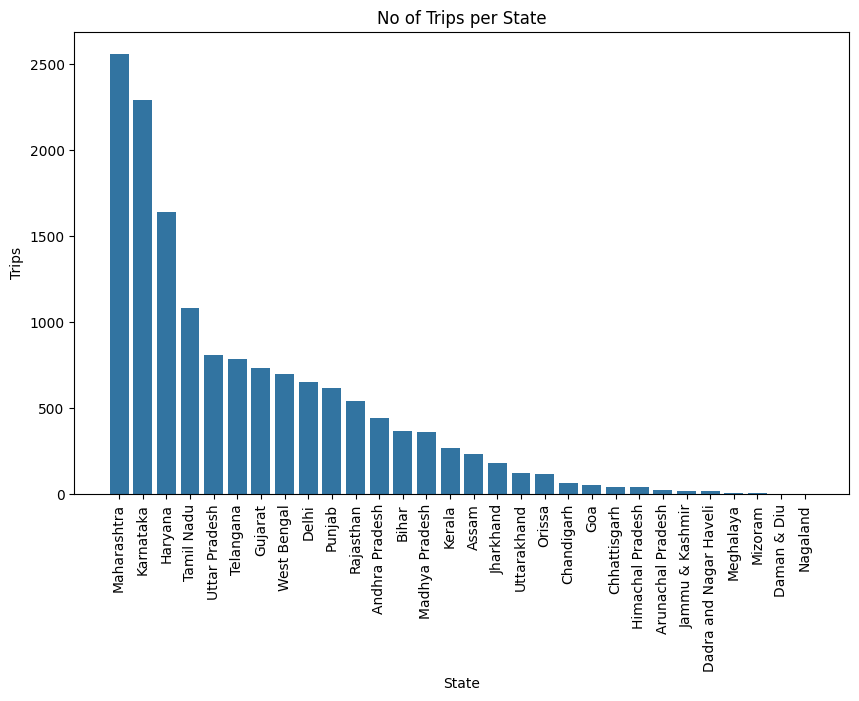

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(data=tripend_states,x='dest_state',y='trip_uuid')
plt.xlabel('State')
plt.ylabel('Trips')
plt.title('No of Trips per State')
plt.xticks(rotation=90)
plt.plot()

**Conclusion:**

Maharastra has the highest trips ends followed by Karnataka and Harayana.

This tells us these three states has high consumer base compared to other states.

**Identify the top 30 cities based on the number of trips created.**

In [53]:
trip_cities=trip.groupby('source_city')['trip_uuid'].count().reset_index()
trip_cities['percent']=np.round(trip_cities['trip_uuid']*100/trip_cities['trip_uuid'].sum(),2)
trip_cities=trip_cities.sort_values(by='trip_uuid',ascending=False)[:30]
trip_cities

,source_city,trip_uuid,percent
258,Gurgaon,1139,7.69
86,Bengaluru,1052,7.10
107,Bhiwandi,697,4.70
469,Mumbai,654,4.41
64,Bangalore,648,4.37
185,Delhi,551,3.72
288,Hyderabad,515,3.48
555,Pune,480,3.24
149,Chennai,338,2.28
471,Mumbai Hub,300,2.02


[]

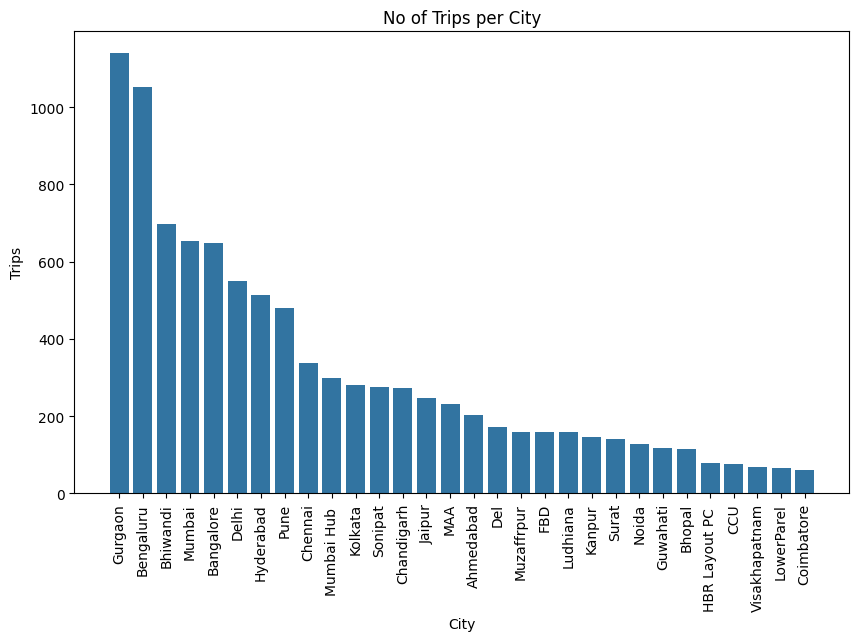

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data=trip_cities,x='source_city',y='trip_uuid')
plt.xlabel('City')
plt.ylabel('Trips')
plt.title('No of Trips per City')
plt.xticks(rotation=90)
plt.plot()

**Identify the top 30 cities based on the number of trips ended.**

In [115]:
tripend_cities=trip.groupby('dest_city')['trip_uuid'].count().reset_index()
tripend_cities['percent']=np.round(tripend_cities['trip_uuid']*100/tripend_cities['trip_uuid'].sum(),2)
tripend_cities=tripend_cities.sort_values(by='trip_uuid',ascending=False)[:30]
tripend_cities

,dest_city,trip_uuid,percent
102,Bengaluru,1088,7.34
549,Mumbai,966,6.52
302,Gurgaon,877,5.92
78,Bangalore,551,3.72
214,Delhi,549,3.71
331,Hyderabad,499,3.37
121,Bhiwandi,434,2.93
174,Chennai,410,2.77
167,Chandigarh,338,2.28
771,Sonipat,322,2.17


[]

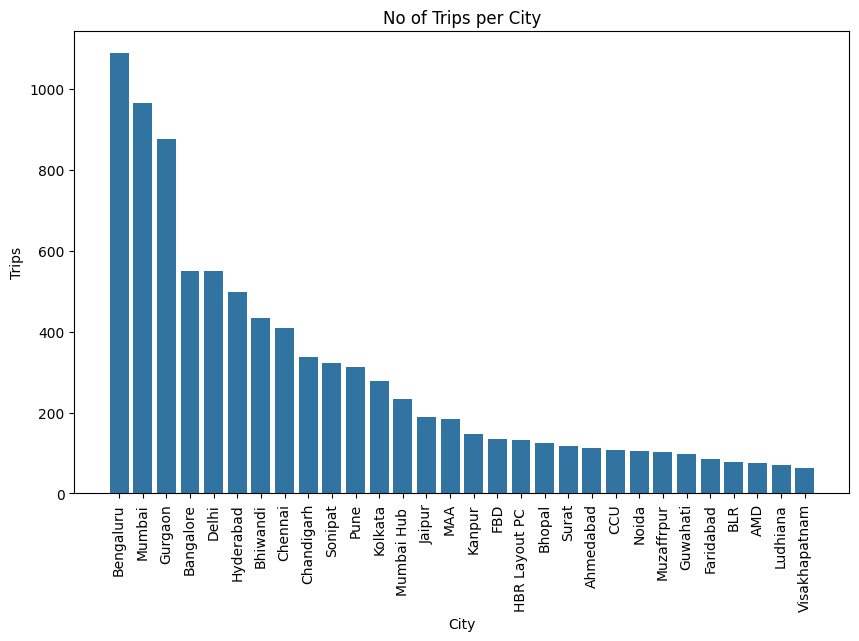

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(data=tripend_cities,x='dest_city',y='trip_uuid')
plt.xlabel('City')
plt.ylabel('Trips')
plt.title('No of Trips per City')
plt.xticks(rotation=90)
plt.plot()

**Analyze which route type takes the most time to reach the destination.**

/tmp/ipython-input-2419493547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')


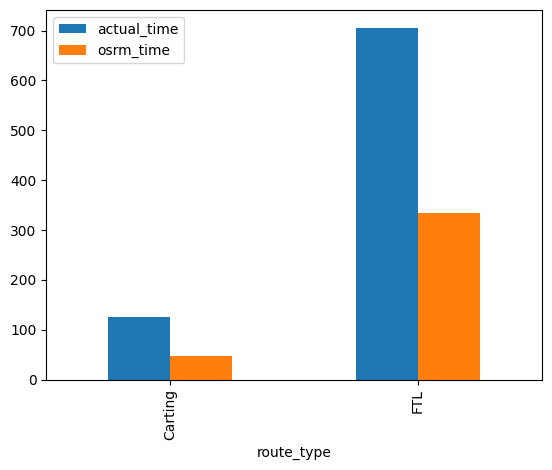

In [55]:
trip.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.show()

**Identify the weekday with the highest number of product deliveries.**

In [56]:
weekday=trip['trip_day_of_week'].value_counts().reset_index()
weekday

,trip_day_of_week,count
0,2,2739
1,5,2130
2,3,2106
3,4,2060
4,1,2040
5,0,1987
6,6,1755


[]

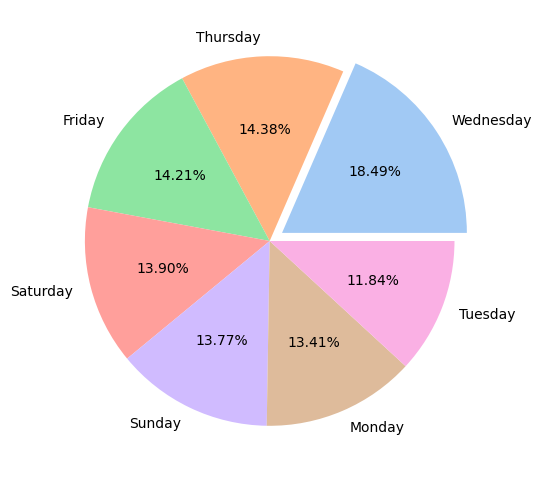

In [57]:
plt.figure(figsize=(8,6))
palette_color=sns.color_palette('pastel')
plt.pie(data=weekday,x=weekday['count'],labels=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'],
        explode=(0.08,0,0,0,0,0,0),colors=palette_color,autopct='%0.2f%%')
plt.plot()

# **4- Indepth analysis**

**Outlier Detection & Treatment**

**A-|Existing Outliers in Numerical Features**

In [58]:
numerical_columns=['od_time_diff_hour','start_scan_to_end_scan','actual_distance_to_destination',
                   'actual_time','osrm_time','osrm_distance','segment_actual_time',
                   'segment_osrm_time','segment_osrm_distance']

[]

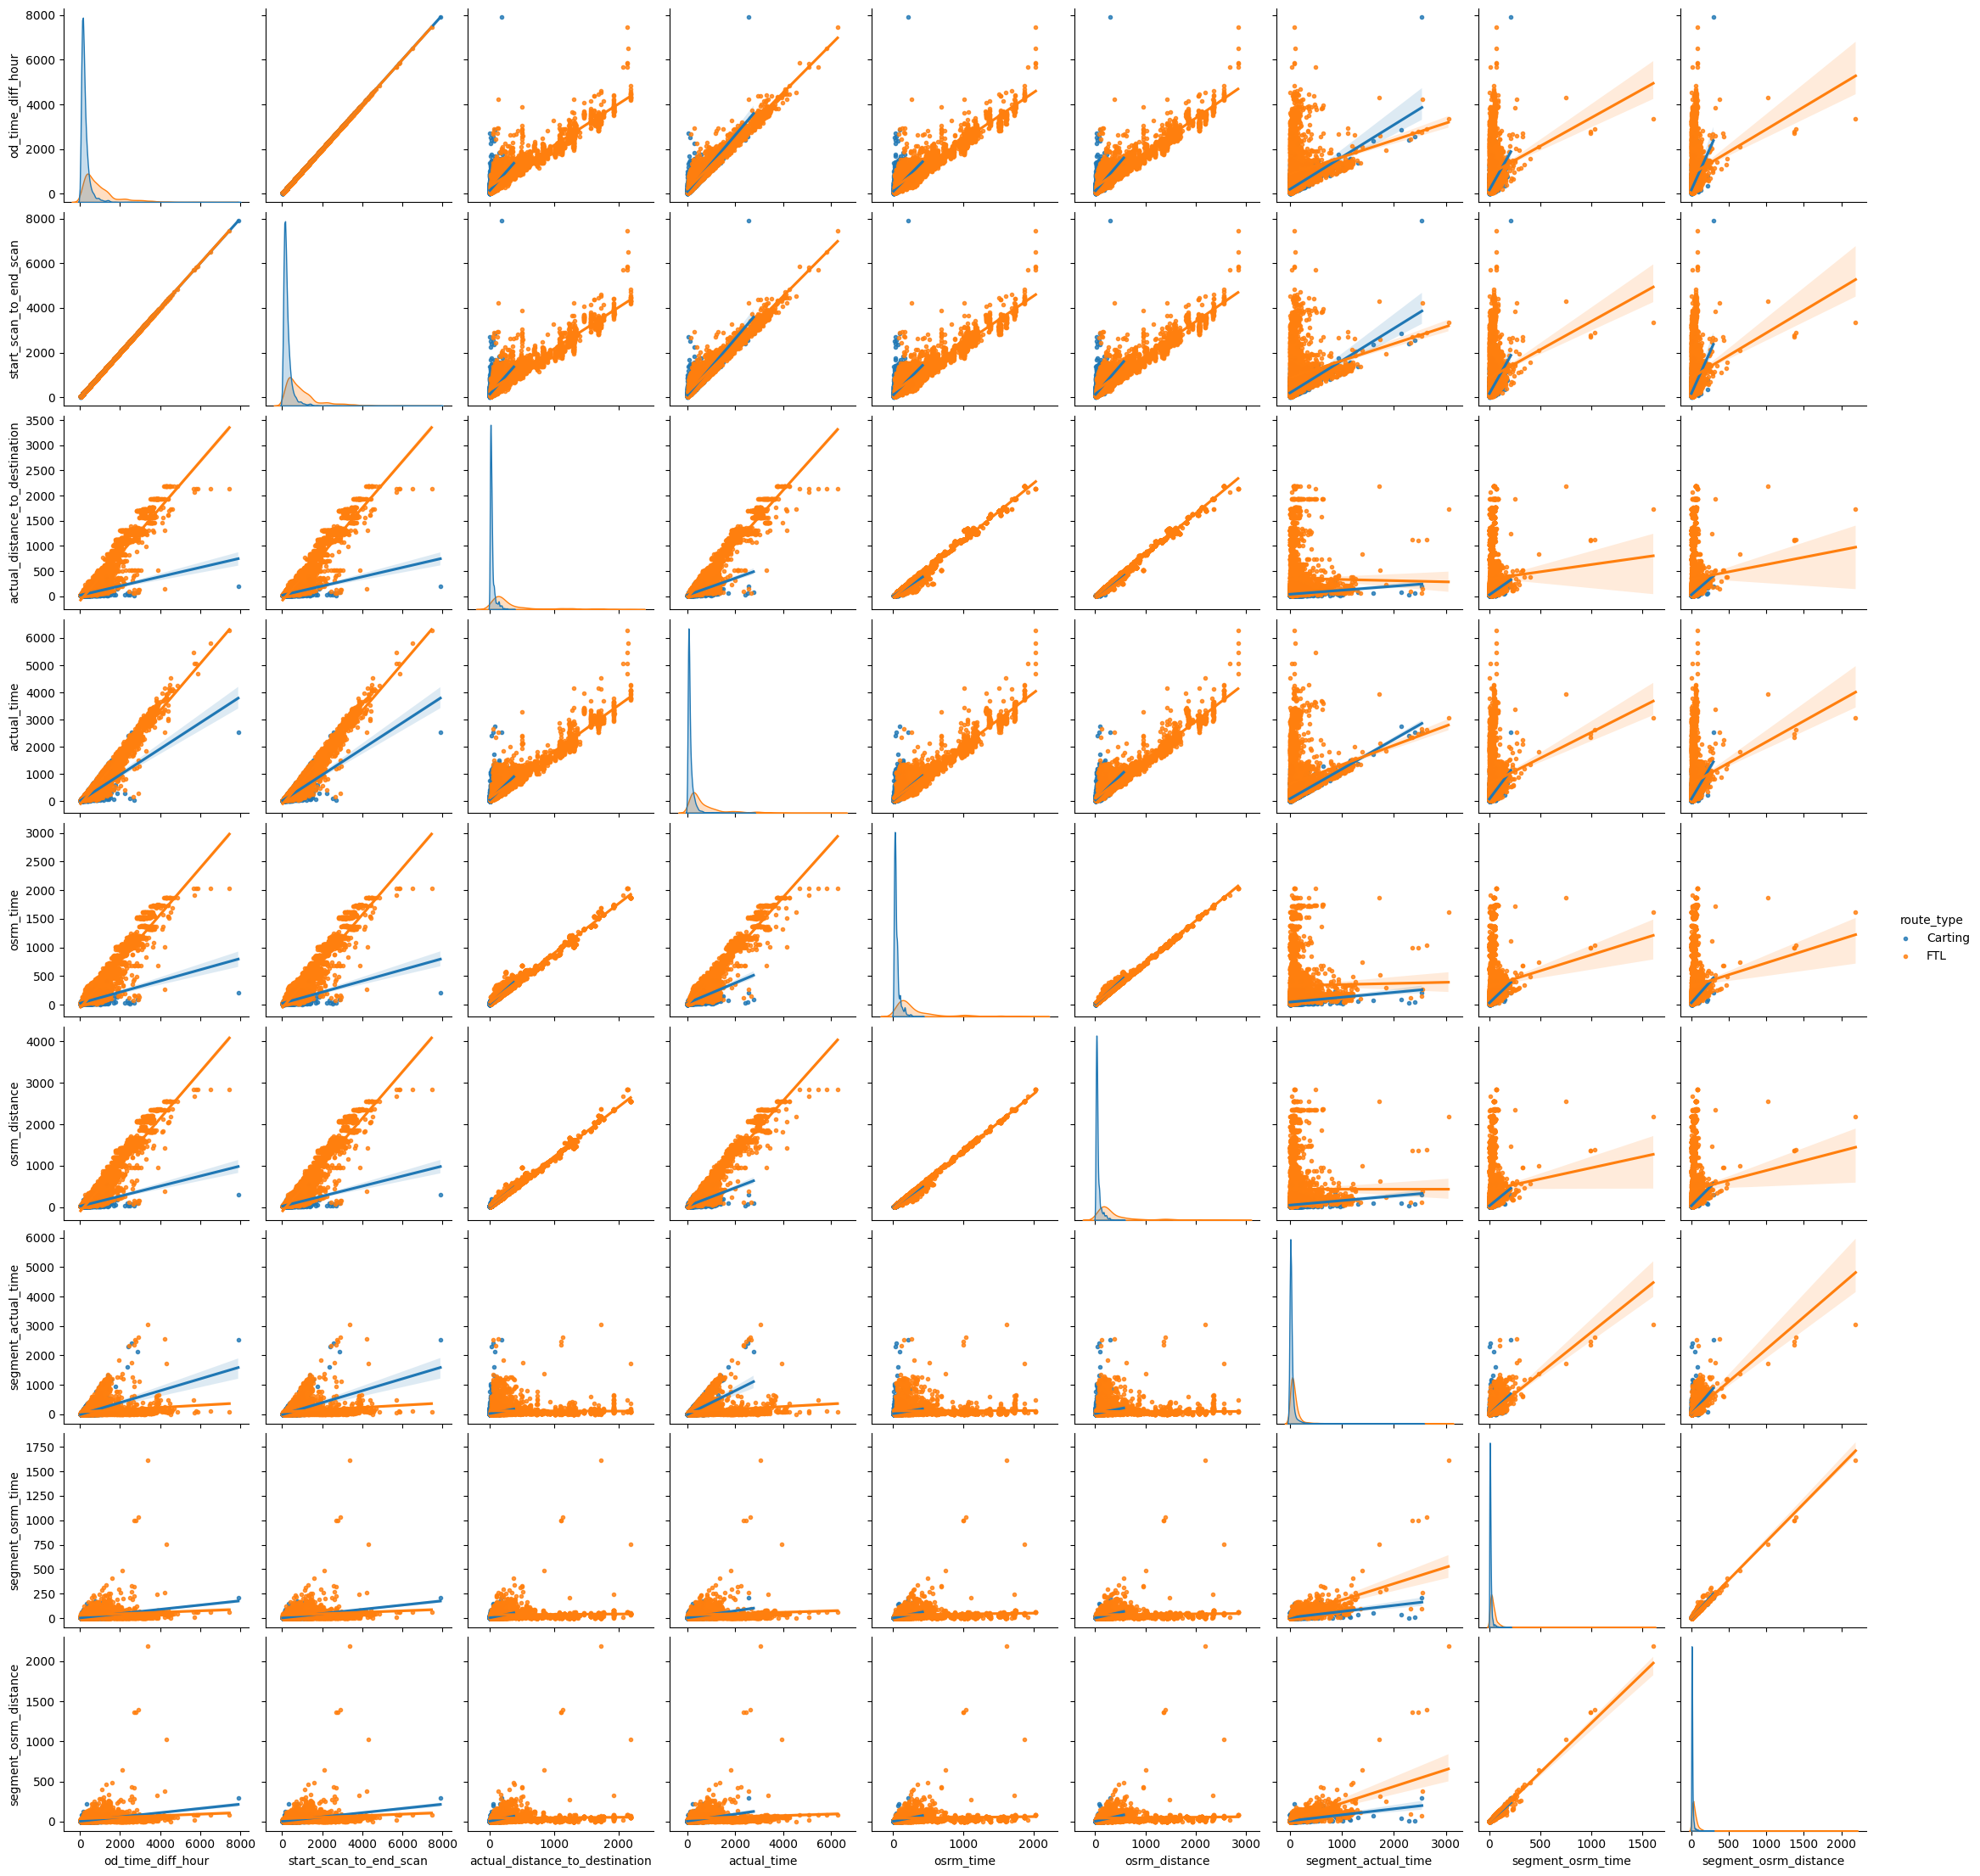

In [59]:
sns.pairplot(data=trip, vars = numerical_columns,kind='reg', markers='.', hue='route_type')
plt.plot()

**B-|Visualize the outlier values using a boxplot.**

In [60]:
numerical_columns=['od_time_diff_hour','start_scan_to_end_scan','actual_distance_to_destination',
                   'actual_time','osrm_time','osrm_distance','segment_actual_time',
                   'segment_osrm_time','segment_osrm_distance']

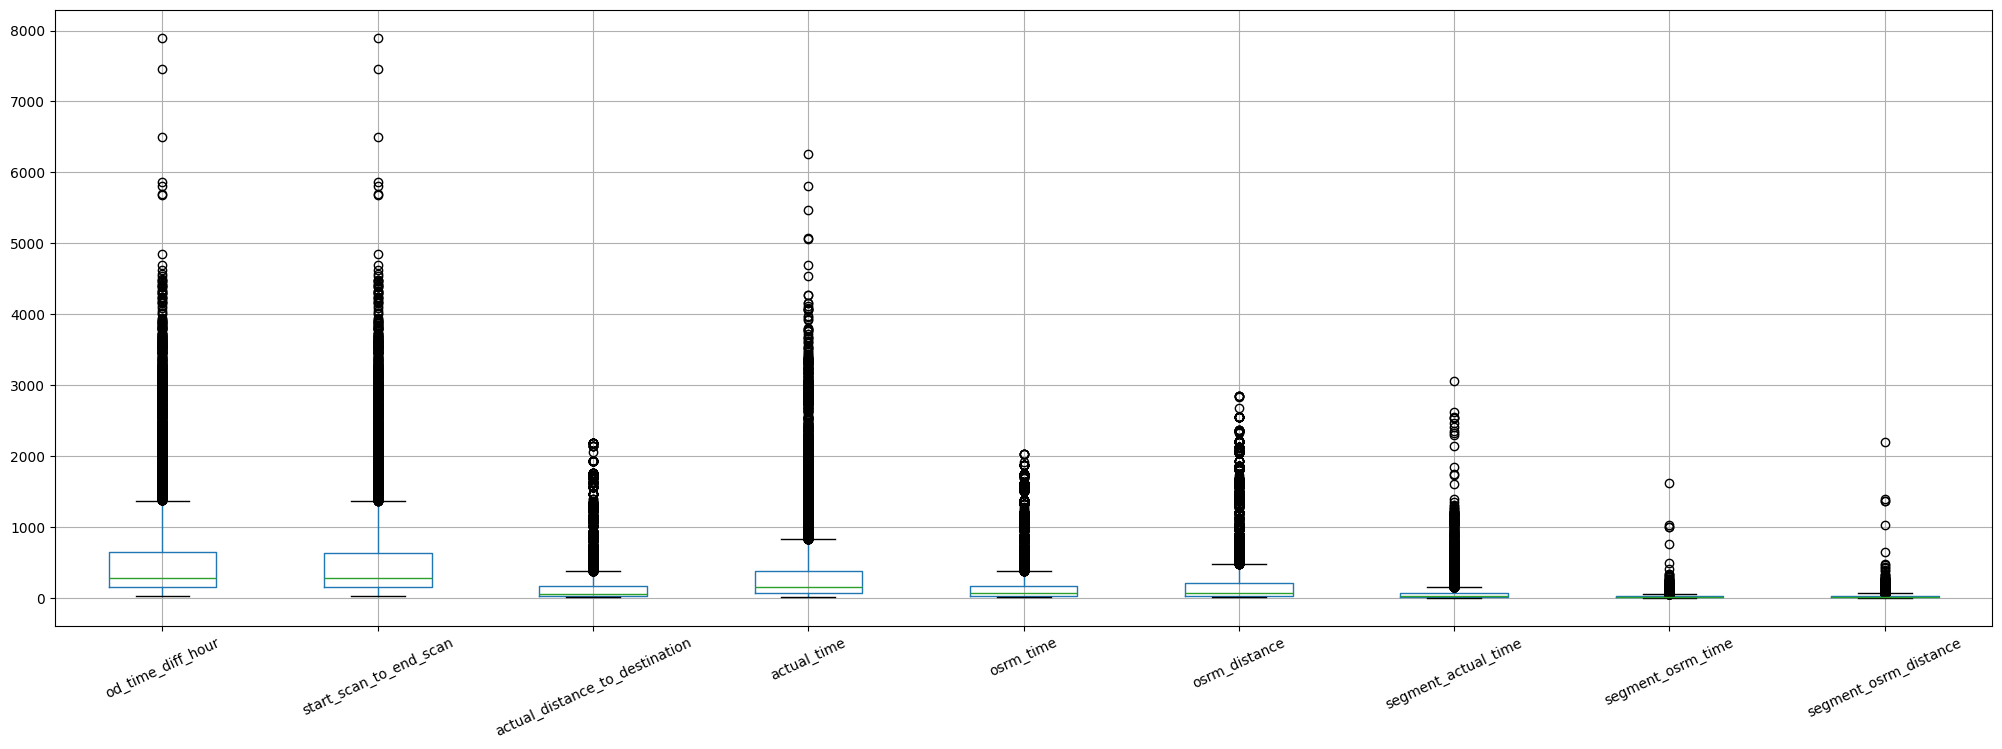

In [61]:
trip[numerical_columns].boxplot(rot=25,figsize=(25,8))
plt.show()

**C-| Handle outliers by applying the IQR (Interquartile Range) method**

In [62]:
trip2=trip.copy()

In [63]:
Q1=trip2[numerical_columns].quantile(0.25)
Q3=trip2[numerical_columns].quantile(0.75)
IQR=Q3-Q1

Lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR

Outliers=trip2[~((trip2[numerical_columns]<Lower_bound)|(trip2[numerical_columns]>Upper_bound)).any(axis=1)]
Outliers=Outliers.reset_index(drop=True)
Outliers

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_day_of_week
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Maharashtra,Mumbai Hub,None,None,2018,9,0,12,37,2
2,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),189.0,...,Tamil Nadu,Chennai,Poonamallee,None,2018,9,0,12,37,2
3,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,...,Tamil Nadu,Chennai,Chrompet,DPC,2018,9,0,12,37,2
4,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,trip-153671066826362165,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),146.0,...,Karnataka,HBR Layout PC,None,None,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,test,2018-10-03 23:55:01.637939,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153861090163768194,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),58.0,...,Tamil Nadu,Chennai,Poonamallee,None,2018,10,23,3,40,2
11495,test,2018-10-03 23:55:18.430664,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153861091843037040,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),88.0,...,Maharashtra,Mumbai Hub,None,None,2018,10,23,3,40,2
11496,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,...,Punjab,Chandigarh,Mehmdpur,H,2018,10,23,3,40,2
11497,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,...,Haryana,FBD,Balabhgarh,DPC,2018,10,23,3,40,2


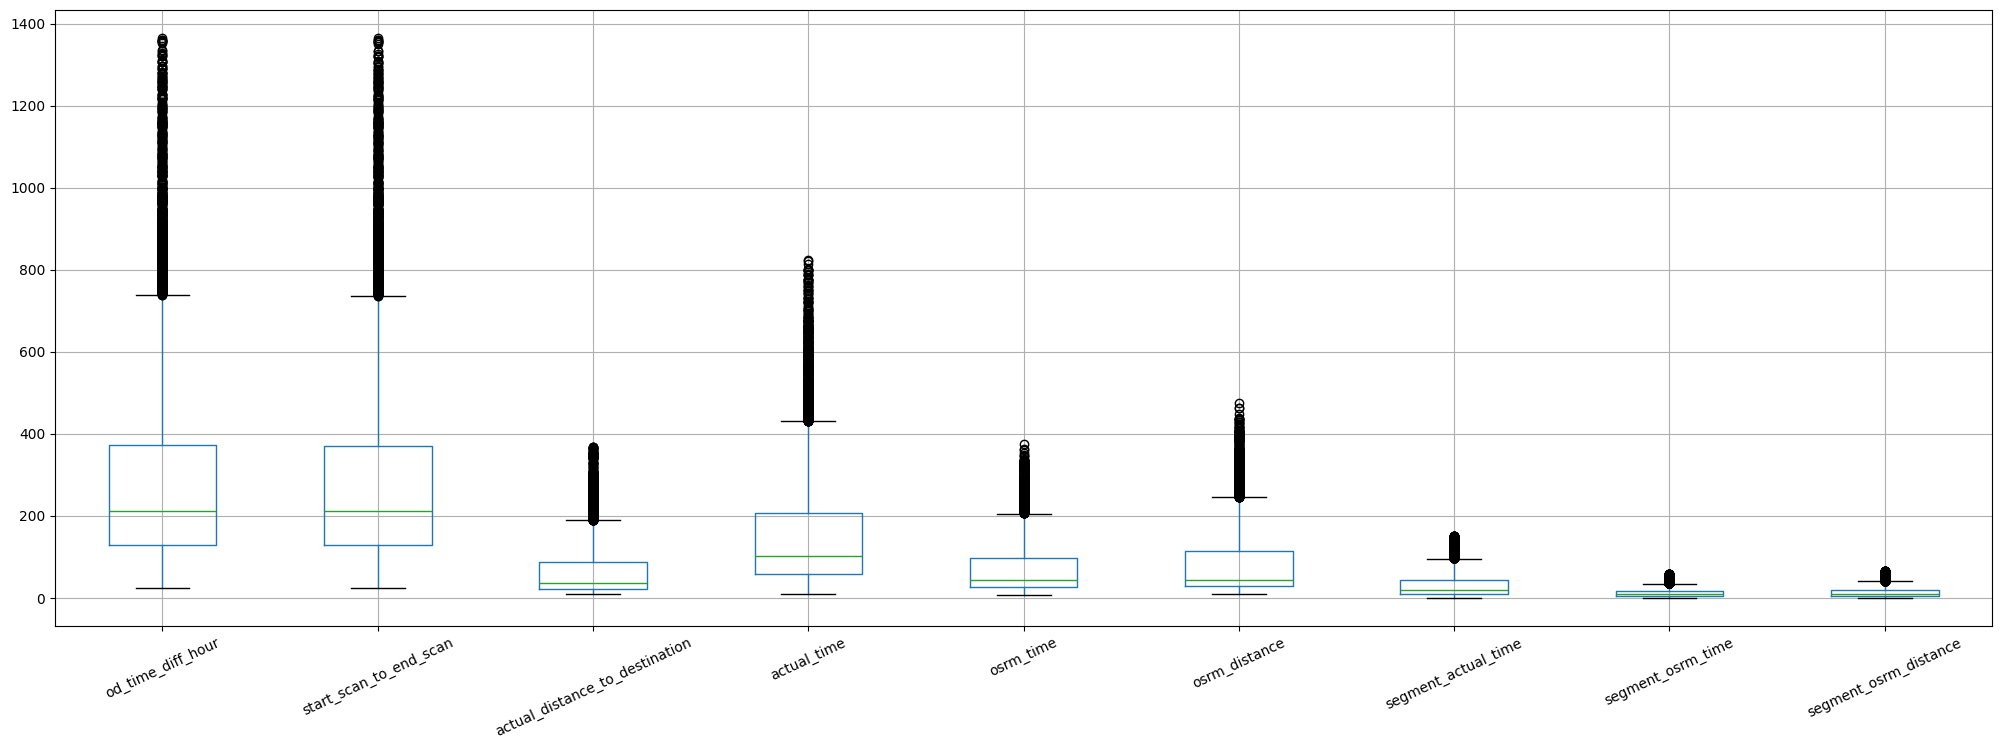

In [65]:
Outliers[numerical_columns].boxplot(rot=25,figsize=(25,8))
plt.show()

**Apply one-hot encoding to the categorical features.**

In [66]:
trip2['route_type'].value_counts()

,count
route_type,
Carting,8908
FTL,5909


In [67]:
trip2['route_type']=trip['route_type'].map({'FTL':'0','Carting':'1'})

# **5- Hypothesis Testing**

**1-|Perform hypothesis testing or visual analysis to compare the aggregated actual_time with the aggregated OSRM time**

In [68]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_day_of_week
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,...,Uttar Pradesh,Kanpur,Central,H_6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,...,Haryana,Gurgaon,Bilaspur,HB,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Maharashtra,Mumbai Hub,None,None,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,Karnataka,Bellary,Dc,None,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,...,Punjab,Chandigarh,Mehmdpur,H,2018,10,23,3,40,2
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,...,Haryana,FBD,Balabhgarh,DPC,2018,10,23,3,40,2
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,...,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,10,23,3,40,2
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,...,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,10,23,3,40,2


In [69]:
trip[['actual_time','osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143768,161.384018
std,561.395020,271.362549
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


**Which visual tests can be used to check if the samples follow a normal distribution?**

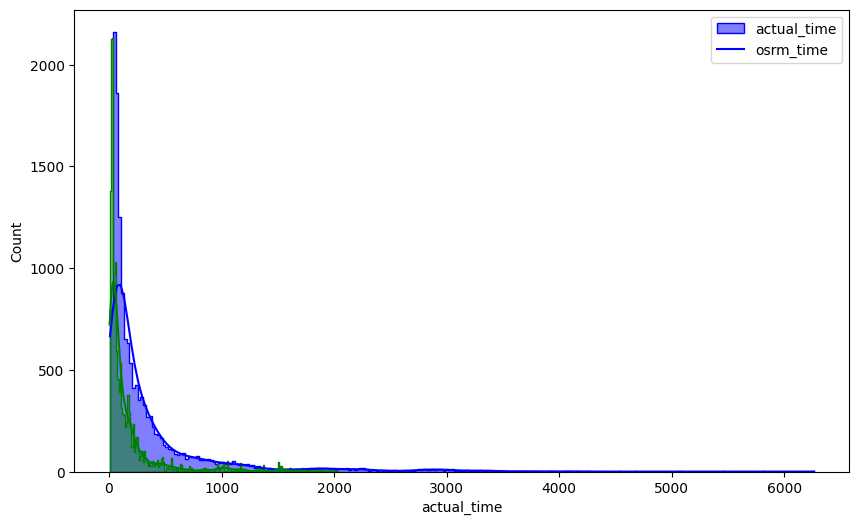

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(data=trip['actual_time'],element='step',color='blue',kde=True)
sns.histplot(data=trip['osrm_time'],element='step',color='green',kde=True)
plt.legend(['actual_time','osrm_time'])
plt.show()

**Check the distribution of the data using a Q-Q (Quantile-Quantile) plot.**

[]

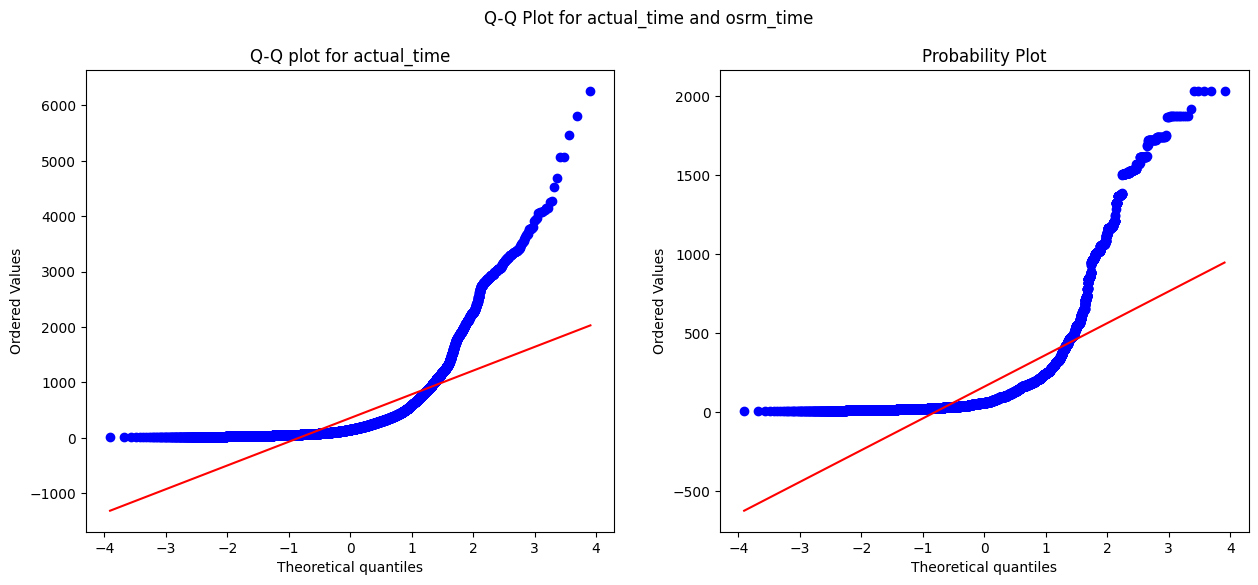

In [71]:
import scipy.stats as spy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.suptitle('Q-Q Plot for actual_time and osrm_time')
spy.probplot(trip['actual_time'],dist='norm',plot=plt)
plt.title('Q-Q plot for actual_time')
plt.subplot(1,2,2)
spy.probplot(trip['osrm_time'],dist='norm',plot=plt)
plt.plot()

As per above plots the sample are not normally distributed

* Applying Shapiro wilks test for normality

H0: The Sample are normally distributed.

H1: The Sample are not normally distributed.

Significance level(alpha=0.05)

In [72]:
t_stat,p_value=spy.shapiro(trip['actual_time'].sample(5000))
print(f't_statistics:{t_stat}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value>alpha:
      print('The test follows normal distribution')
else:
      print('The test does not follows normal distribution')

t_statistics:0.5809169245074883
p_value:2.2282703530729323e-76
The test does not follows normal distribution


In [73]:
t_stat,p_value=spy.shapiro(trip['osrm_time'].sample(5000))
print(f't_statistics:{t_stat}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value>alpha:
      print('The test follows normal distribution')
else:
      print('The test does not follows normal distribution')

t_statistics:0.5520118809334325
p_value:8.596581737743027e-78
The test does not follows normal distribution


2-|Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [74]:
transformed_actual_time=spy.boxcox(trip['actual_time'])[0]
t_test,p_value=spy.shapiro(transformed_actual_time)
print(f't_statistics:{t_test}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follows normal distribution')
else:
      print('The test  follows normal distribution')

t_statistics:0.9914443368136703
p_value:1.0597460092329525e-28
The test does not follows normal distribution


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [75]:
transformed_osrm_time=spy.boxcox(trip['osrm_time'])[0]
t_stat,p_value=spy.shapiro(transformed_osrm_time)
print(f't_statistics:{t_stat}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follows normal distribution')
else:
      print('The test  follows normal distribution')

t_statistics:0.9863293684243581
p_value:3.518329260473805e-35
The test does not follows normal distribution


**The sample is not normally distributed**

**Check for homogeneity of variances using Levene’s test.**

H0: The sample are Homogeneous

H1: The sample are Non Homogeneous

Significance level(alpha=0.05)

In [76]:
t_stat,p_value=spy.levene(trip['actual_time'],trip['osrm_time'])
print(f't_statistics:{t_stat}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The sample are Non Homogeneous')
else:
      print('The sample are Homogeneous')

t_statistics:1021.7563451733178
p_value:1.871297993683208e-220
The sample are Non Homogeneous


**Since p-value < alpha therefore it can be concluded that actual_time and osrm_time are not similar.**

**Since the Samples does not follow assumptions of t test. so, we need to go with Non Parametric test.**

***Wilcoxon Single Ranked Test***

In [77]:
from scipy.stats import wilcoxon
stat,p=wilcoxon(trip['actual_time'],trip['osrm_time'])
print('wilcoxon test p_value:',p)
if p_value<0.05:
  print('samples are not similar')
else:
  print('samples are similar')

wilcoxon test p_value: 0.0
samples are not similar


**Since, p_value is lesser than alpha. we can conclude that Samples are not similar**

**2|Perform hypothesis testing or visual analysis to compare the aggregated actual_time with the aggregated segment_actual_time.**

In [78]:
trip[['actual_time','segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143768,65.683876
std,561.395020,141.244736
min,9.000000,0.000000
25%,67.000000,11.000000
50%,149.000000,28.000000
75%,370.000000,67.000000
max,6265.000000,3051.000000


**Which visual tests can be used to check if the samples follow a normal distribution?**

[]

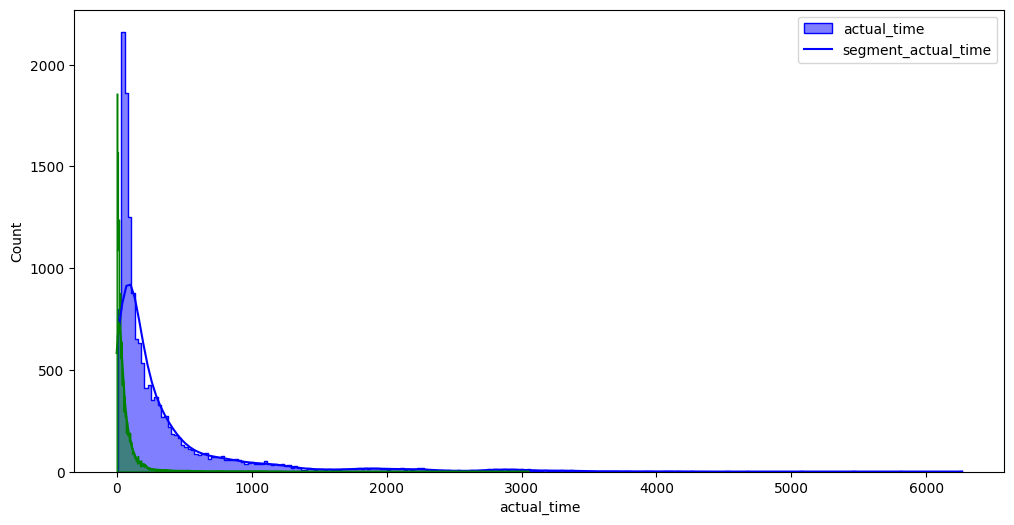

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(data=trip['actual_time'],element='step',color='blue',kde=True)
sns.histplot(data=trip['segment_actual_time'],element='step',color='green',kde=True)
plt.legend(['actual_time','segment_actual_time'])
plt.plot()

**Check the distribution of the data using a Q-Q (Quantile-Quantile) plot.**

[]

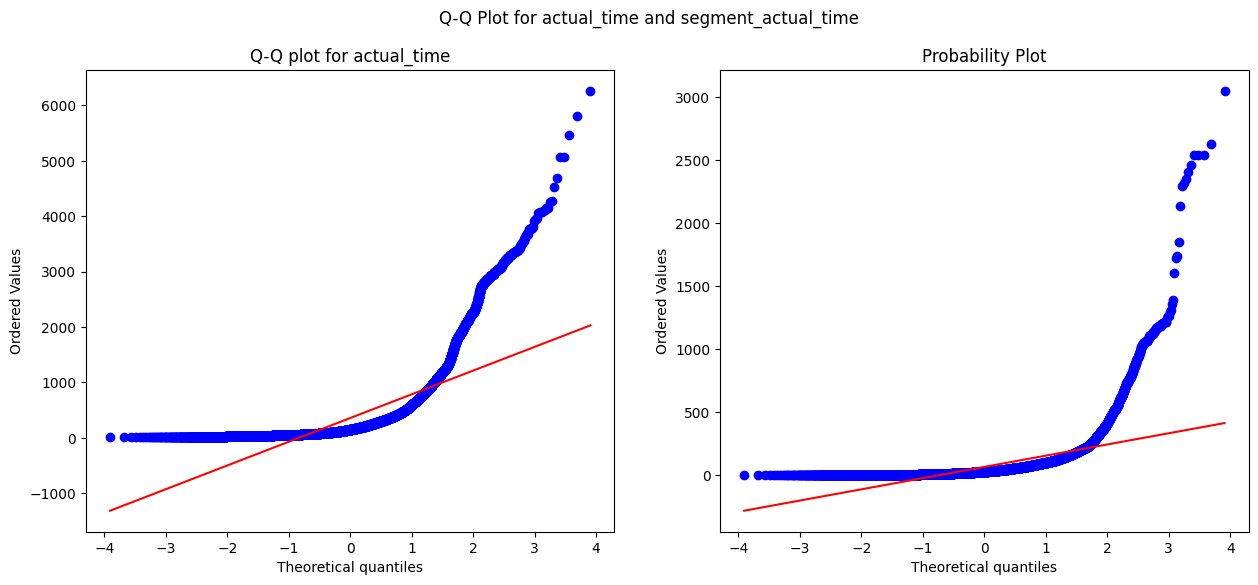

In [80]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.suptitle('Q-Q Plot for actual_time and segment_actual_time')
spy.probplot(trip['actual_time'],dist='norm',plot=plt)
plt.title('Q-Q plot for actual_time')
plt.subplot(1,2,2)
spy.probplot(trip['segment_actual_time'],dist='norm',plot=plt)
plt.plot()

**Applying Shapiro wilks test for normality**

H0: The sample follows normal distribution.

H1: The sample does not follow normal distribution.

Alpha= 0.05

In [81]:
t_stats,p_value=spy.shapiro(trip['actual_time'].sample(5000))
print(f't_statistics:{t_stats}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follows normal distribution')
else:
      print('The test follows normal distribution')

t_statistics:0.5765183005460959
p_value:1.3413610188607542e-76
The test does not follows normal distribution


In [82]:
t_stats,p_value=spy.shapiro(trip['segment_actual_time'].sample(5000))
print(f't_statistics:{t_stats}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

t_statistics:0.3955994795429151
p_value:2.652319030384711e-84
The test does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [83]:
transformed_actual_time=spy.boxcox(trip['actual_time'])[0]
t_stats,p_value=spy.shapiro(trip['actual_time'])
print(f't_statistics:{t_stats}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

t_statistics:0.5816853308852952
p_value:1.6650167910314194e-103
The test does not follow normal distribution


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [84]:
transformed_segmented_actual_time=spy.boxcox(trip['segment_actual_time'])[0]
t_stats,p_value=spy.shapiro(trip['segment_actual_time'])
print('p_value',p_value)
alpha=0.05
if p_value<0.05:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

ValueError: Data must be positive.

Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, the distributions do not follow normal distribution

**Check for homogeneity of variances using Levene’s test.**

H0: Sample has Homogenous Variance

H1: Sample does not have Homogenous Variance

Alpha=0.05

In [86]:
test_stat,p_value=spy.levene(trip['actual_time'],trip['segment_actual_time'])
print(f't_statistics:{test_stat}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The sample have homogenous variance')
else:
      print('The sample does not have homogenous variance')

t_statistics:2657.1593428419174
p_value:0.0
The sample have homogenous variance


In [87]:
from scipy.stats import wilcoxon
stat,p=wilcoxon(trip['actual_time'],trip['segment_actual_time'])
print('wilcoxon test p_value:',p)
if p_value<0.05:
  print('samples are similar')
else:
  print('samples are not similar')

wilcoxon test p_value: 0.0
samples are similar


**Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.**

**3|Perform hypothesis testing or visual analysis to compare the aggregated OSRM distance with the aggregated segment OSRM distance**

In [88]:
trip[['osrm_distance','segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344711,23.473555
std,370.395508,41.236614
min,9.072900,0.000000
25%,30.819201,4.988100
50%,65.618805,11.542500
75%,208.475006,28.963001
max,2840.081055,2191.403809


**Visual Tests to know if the samples follow normal distribution**

[]

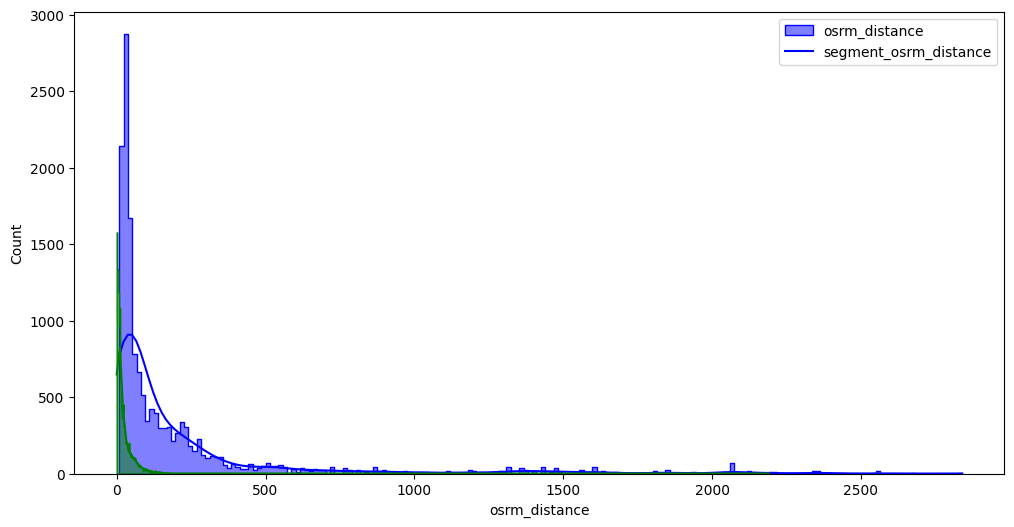

In [89]:
plt.figure(figsize=(12,6))
sns.histplot(data=trip['osrm_distance'],element='step',color='blue',kde=True)
sns.histplot(data=trip['segment_osrm_distance'],element='step',color='green',kde=True)
plt.legend(['osrm_distance','segment_osrm_distance'])
plt.plot()

**Distribution check using QQ Plot**

[]

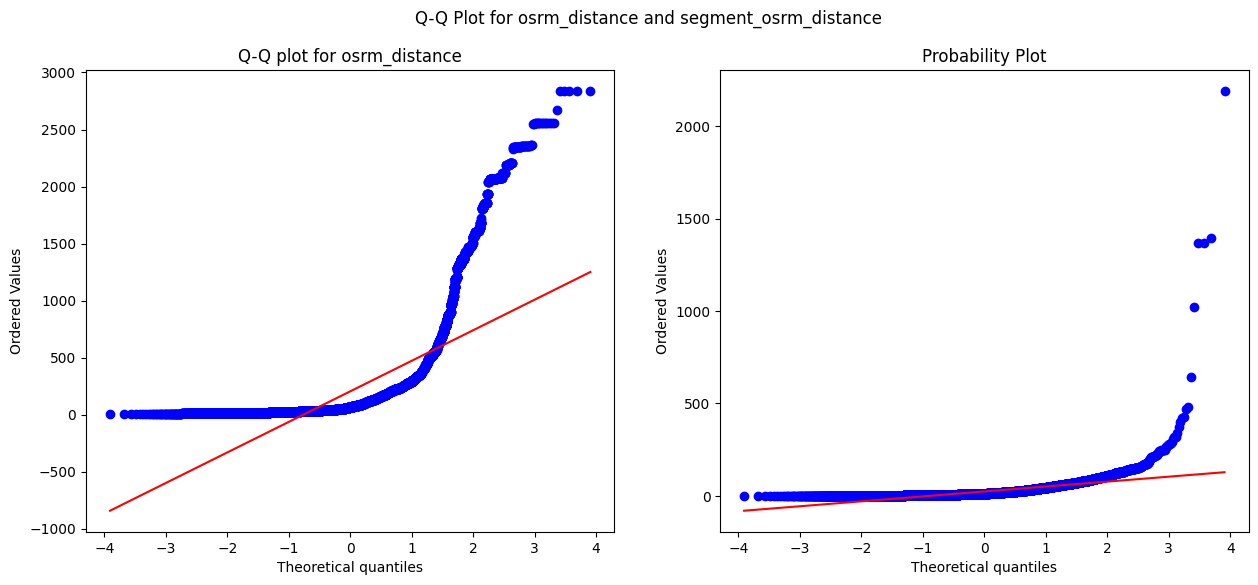

In [90]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.suptitle('Q-Q Plot for osrm_distance and segment_osrm_distance')
spy.probplot(trip['osrm_distance'],dist='norm',plot=plt)
plt.title('Q-Q plot for osrm_distance')
plt.subplot(1,2,2)
spy.probplot(trip['segment_osrm_distance'],dist='norm',plot=plt)
plt.plot()

**From the visuals we can clearly say that the data is not normally distributed**

**Applying Shapiro wilks test for normality**

H0: The sample does not follow normal distribution

H1: The sample follows normal distribution

alpha=0.05

In [91]:
t_stats,p_value=spy.shapiro(trip['osrm_distance'].sample(5000))
print(f't_statistics:{t_stats}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

t_statistics:0.522682385715139
p_value:3.783966696044622e-79
The test does not follow normal distribution


In [92]:
t_stats,p_value=spy.shapiro(trip['segment_osrm_distance'].sample(5000))
print(f't_statistics:{t_stats}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')


t_statistics:0.6484307341391091
p_value:1.0177452504288547e-72
The test does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [94]:
transformed_osrm_distance=spy.boxcox(trip['osrm_distance'])[0]
t_test,p_value=spy.shapiro(transformed_osrm_distance)
print(f't_statistics:{t_test}')
print(f'p_value:{p_value}')
if p_value<0.05:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

t_statistics:0.980094365181948
p_value:7.099194840621603e-41
The test does not follow normal distribution


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [95]:
transformed_segmented_osrm_distance=spy.boxcox(trip['segment_osrm_distance'])[0]
t_test,p_value=spy.shapiro(transformed_segmented_osrm_distance)
print(f't_statistics:{t_test}')
print(f'p_value:{p_value}')
if p_value<0.05:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

ValueError: Data must be positive.

**The Sample doesn't follow normal distribution**

**Check for homogeneity of variances using Levene’s test.**

H0: Sample are Homogenous Variance

H1: Sample are non Homogenous Variance

In [96]:
t_stat,p_value=spy.levene(trip['osrm_distance'],trip['segment_osrm_distance'])
print('p_value',p_value)
if p_value<0.05:
      print('The sample are non homogenous variance')
else:
      print('The sample are homogenous variance')

p_value 0.0
The sample are non homogenous variance


Since, The sample does not follow any assumptions of t-test. So we need to go ahead with Non parametric test

**Mann-whitney U Rank test**

In [97]:
t_test,p_value=spy.mannwhitneyu(trip['osrm_distance'],trip['segment_osrm_distance'])
print('t_test',t_test)
print('p_value',p_value)
if p_value<0.05:
  print('samples are not similar')
else:
  print('samples are similar')

t_test 189921448.5
p_value 0.0
samples are not similar


***Since p_value is less than alpha. we can conclude that Samples are not similar***

**4|Perform hypothesis testing and visual analysis to compare OSRM time aggregated values with segment OSRM time aggregated values, where both sets of values are obtained by merging rows based on trip_uuid**

In [99]:
trip[['osrm_time','segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,161.384018,20.891880
std,271.362549,33.398693
min,6.000000,0.000000
25%,29.000000,5.000000
50%,60.000000,11.000000
75%,168.000000,26.000000
max,2032.000000,1611.000000


**Visualize test to check normal distribution**

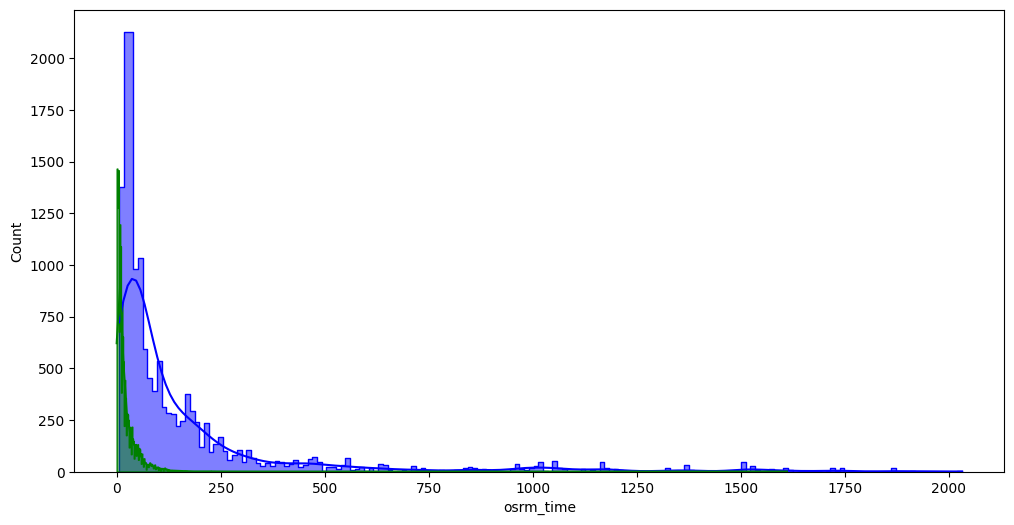

In [101]:
plt.figure(figsize=(12,6))
sns.histplot(data=trip['osrm_time'],element='step',color='blue',kde=True)
sns.histplot(data=trip['segment_osrm_time'],element='step',color='green',kde=True)
plt.show()

**Distribution Check from Q-Q Plot**

[]

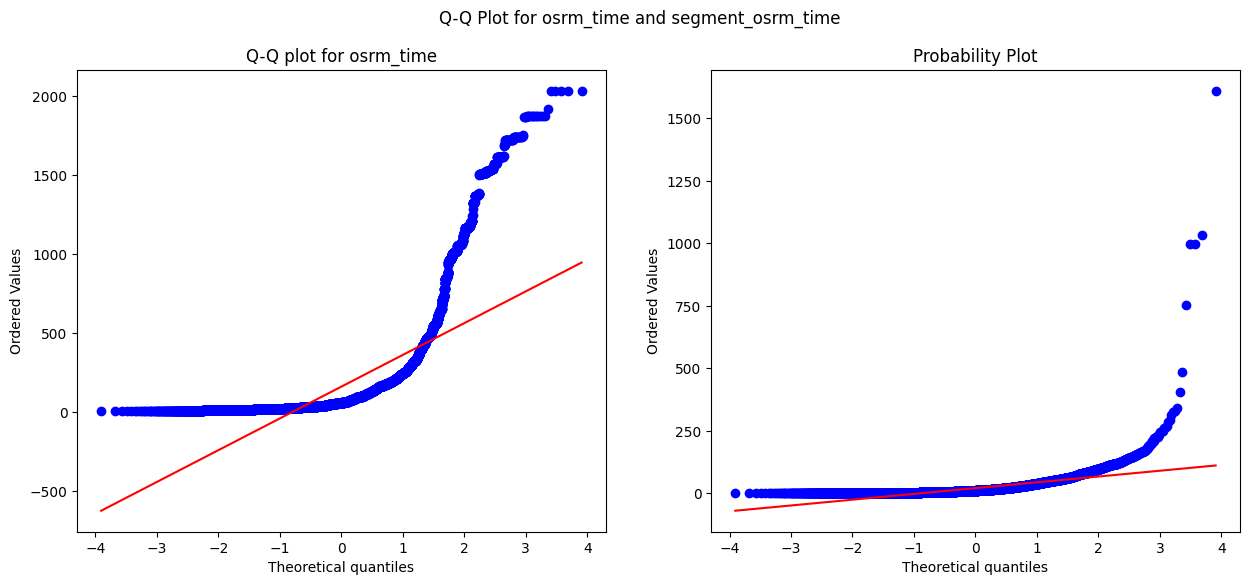

In [102]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.suptitle('Q-Q Plot for osrm_time and segment_osrm_time')
spy.probplot(trip['osrm_time'],dist='norm',plot=plt)
plt.title('Q-Q plot for osrm_time')
plt.subplot(1,2,2)
spy.probplot(trip['segment_osrm_time'],dist='norm',plot=plt)
plt.plot()

**From above Plots we understand that the sample does not follow Normal distribution**

**Shapiro wilk's test for Normality**

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

Alpha=0.05

In [103]:
t_stats,p_value=spy.shapiro(trip['osrm_time'].sample(5000))
print(f't_statistics:{t_stats}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

t_statistics:0.5525097367056886
p_value:9.078241220793965e-78
The test does not follow normal distribution


In [104]:
t_stats,p_value=spy.shapiro(trip['segment_osrm_time'].sample(5000))
print(f't_statistics:{t_stats}')
print(f'p_value:{p_value}')
alpha=0.05
if p_value<alpha:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

t_statistics:0.49456546367074516
p_value:2.205135419720043e-80
The test does not follow normal distribution


Transforming the data using boxcox to check the normality of the samples

In [105]:
transformed_osrm_time=spy.boxcox(trip['osrm_time'])[0]
t_test,p_value=spy.shapiro(transformed_osrm_time)
print(f't_statistics:{t_test}')
print(f'p_value:{p_value}')
if p_value<0.05:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

t_statistics:0.9863293684243581
p_value:3.518329260473805e-35
The test does not follow normal distribution


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [106]:
transformed_segment_osrm_time=spy.boxcox(trip['segment_osrm_time'])[0]
t_test,p_value=spy.shapiro(transformed_segment_osrm_time)
print(f't_statistics:{t_test}')
print(f'p_value:{p_value}')
if p_value<0.05:
      print('The test does not follow normal distribution')
else:
      print('The test follows normal distribution')

ValueError: Data must be positive.

**The transformed data is also not normally distributed**

**We can conclude that sample is not normally distributes**

**Levene's test for Homogenity**

H0: The Sample are Homogenous

H1: The Sample are Non Homogenous

In [107]:
t_test,p_value=spy.levene(trip['osrm_time'],trip['segment_osrm_time'])
print('p_value',p_value)
if p_value<0.05:
      print('The sample are non homogenous variance')
else:
      print('The sample are homogenous variance')

p_value 0.0
The sample are non homogenous variance


The sample does not follow t_test assumptions. So we need to go ahead with Non parametric test

***Mann-whitney U Rank Test***

In [110]:
t_test,p_value=spy.mannwhitneyu(trip['osrm_time'],trip['segment_osrm_time'])
print('p_value',p_value)
if p_value<0.05:
  print('samples are not similar')
else:
  print('samples are similar')

p_value 0.0
samples are not similar


**Since p_value is less than alpha. we can conclude that Samples are not similar**